<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자산총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자산총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정 (종목명은 Lecture Note를 참조)
- 이후 `concat`으로 합치기
- 합친 이후의 index는 `분기`로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [78]:
import pandas as pd
 
urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
stock_code =  ['000080', '000890', '005300', '027740', '035810', '136480']
stock_name = ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림']

# 빈 데이터프레임 생성
df = pd.DataFrame()

# 데이터 불러온 후 다듬기
def getData(idx, code):
  df = pd.read_csv(urlhead + code + '.csv') # csv 파일 가져오기
  df = df.T # 행열 자리 바꾸기

  # 인덱스 맨 위 글자 바꾸기
  df.rename(index={'Unnamed: 0':''}, inplace=True)

  df.columns = df.iloc[0] # 첫번째 행을 열 이름으로 지정
  df = df[-1:] # 제일 최근 분기(마지막) 데이터만 남기기

  df.index = df.index.str.slice(start=0, stop=7) # 연도와 월만 남기고 나머지 글자 지우기
  df = df[['매출액','자산총계', 'EPS(원)']] # 매출액, 자산총계, EPS feature만 남기기
  df['종목명'] = stock_name[idx] # 종목명 열과 값 넣기

  return df

# concat으로 데이터 합치기
for idx, code in enumerate(stock_code):
  df = pd.concat([df,getData(idx, code)])

In [79]:
# 결과
df

,매출액,자산총계,EPS(원),종목명
2020/09,"6,243","39,617",453,하이트진로
2020/09,205,"1,555",3,보해양조
2020/09,"5,980","34,066","1,682",롯데칠성
2020/09,521,"1,897",-61,마니커
2020/06,"4,108","18,966","1,168",이지홀딩스
2020/09,"2,613","8,550",62,하림


## 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




In [3]:
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 네이버 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') # 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 오류 해결

In [80]:
def toInt(input):
  return int(input.replace(',', ''))

# 종목명을 기준으로 나머지 요소들 tidy 형태로 바꾸기
df_tidy = df.melt(id_vars='종목명', value_vars=['매출액','자산총계', 'EPS(원)'], var_name='Feature', value_name='Value')

# Value의 요소를 숫자 형식으로 형변환
df_tidy['Value'] = pd.to_numeric(df_tidy['Value'].apply(toInt))

# 결과
df_tidy

,종목명,Feature,Value
0,하이트진로,매출액,6243
1,보해양조,매출액,205
2,롯데칠성,매출액,5980
3,마니커,매출액,521
4,이지홀딩스,매출액,4108
5,하림,매출액,2613
6,하이트진로,자산총계,39617
7,보해양조,자산총계,1555
8,롯데칠성,자산총계,34066
9,마니커,자산총계,1897


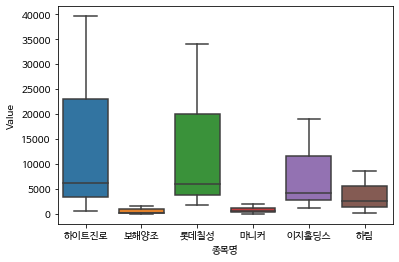

In [81]:
sns.boxplot(data = df_tidy, x = '종목명', y = 'Value');

# boxplot의 결과로 출력된 box 수 res에 저장
res = 6

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [82]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

df2 = left.merge(right, how = 'left')
df2

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자본총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [83]:
import pandas as pd
import seaborn as sns

# 최종 분기에 해당하는 종목 데이터를 데이터프레임으로 만들기
df_stock = pd.DataFrame({
    '종목명' : ['대한해운', '팬오션', 'KSS해운', '세미콘라이트', '오성첨단소재', '에이아이비트'],
    '매출액' : [2108.3, 6834.3, 524.1, 67.4, 208.2, 59.2],
    '자본총계' : [9242.8, 30574.9, 2929.8, 443.7, 1994.6, 521.8],
    'EPS' : [-1567, 79, 300, 280, 118, -4]
})

df_stock

,종목명,매출액,자본총계,EPS
0,대한해운,2108.3,9242.8,-1567
1,팬오션,6834.3,30574.9,79
2,KSS해운,524.1,2929.8,300
3,세미콘라이트,67.4,443.7,280
4,오성첨단소재,208.2,1994.6,118
5,에이아이비트,59.2,521.8,-4


In [84]:
# 테마별 평균 데이터를 담은 데이터프레임 만들기
df_stock['테마'] = ['해운', '해운', '해운', '마리화나(대마)', '마리화나(대마)', '마리화나(대마)']
df_mean_by_theme = df_stock.groupby('테마').mean().round(1)
df_mean_by_theme.reset_index(inplace=True)

df_mean_by_theme

,테마,매출액,자본총계,EPS
0,마리화나(대마),111.6,986.7,131.3
1,해운,3155.6,14249.2,-396.0


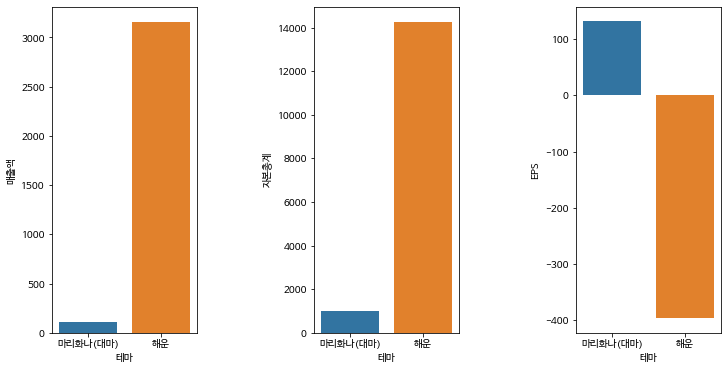

In [85]:
# 매출액, 자본총계, EPS별로 각 테마의 값을 bar plot로 보여주기
fig, ax = plt.subplots(ncols=3, figsize=(12, 6))
plt.subplots_adjust(wspace=0.8)

sns.barplot(x='테마', y = '매출액', data = df_mean_by_theme, ax=ax[0]);
sns.barplot(x='테마', y = '자본총계', data = df_mean_by_theme, ax=ax[1]);
sns.barplot(x='테마', y = 'EPS', data = df_mean_by_theme, ax=ax[2]);